# Data Preprocessing and Exploratory Data Analysis (EDA)

## Data preprocessing

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd

# To covert columns into datetime variable type
from datetime import datetime

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's try reading our data
# The data is stored locally in path: C:\Users\Sanchayni\Desktop\Spring19\Special Project\Pothole data
pothole_data = pd.read_csv('http://math.iit.edu/~rellis/teaching/497All/497_RR_data/311_Service_Requests.csv')

C:\Users\Sanchayni\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


This results in a warning message of potential mixed data type <br>
Suggestion: low_memory=False or setting a data type <br>
As we don't know what's the datatype of the data before hand lets check what low_memory parameter does

In [3]:
?pd.read_csv

low_memory : boolean, default True

Internally process the file in chunks, resulting in lower memory use
while parsing, but possibly mixed type inference.  To ensure no mixed
types either set False, or specify the type with the `dtype` parameter.

(Doesn't really help. Detailed description: https://rushter.com/blog/pandas-data-type-inference/) 

In [4]:
pothole_data = pd.read_csv('http://math.iit.edu/~rellis/teaching/497All/497_RR_data/311_Service_Requests.csv', 
                           low_memory= False)

In [5]:
pothole_data.head()

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
0,01/01/2011,Completed - Dup,01/03/2011,11-00002110,Pot Hole in Street,NaN,NaN,NaN,7600 S PARNELL AVE,60620.0,1.173863e+06,1.854506e+06,17.0,6.0,69.0,NaN,41.756078,-87.638540,"(41.75607825280598, -87.63853957634103)"
1,01/01/2011,Completed - Dup,01/03/2011,11-00002209,Pot Hole in Street,NaN,NaN,NaN,7100 S PULASKI RD,60629.0,1.150934e+06,1.857221e+06,13.0,8.0,65.0,3.0,41.764008,-87.722499,"(41.764007749308014, -87.72249910770661)"
2,01/01/2011,Completed - Dup,01/03/2011,11-00002224,Pot Hole in Street,NaN,NaN,NaN,2400 W FULLERTON AVE,60647.0,1.159964e+06,1.915885e+06,1.0,14.0,22.0,NaN,41.925010,-87.687705,"(41.92500993476519, -87.68770475222249)"
3,01/01/2011,Completed - Dup,01/03/2011,11-00002247,Pot Hole in Street,NaN,NaN,NaN,11100 S HALSTED ST,60628.0,1.172963e+06,1.831243e+06,34.0,22.0,75.0,45.0,41.692263,-87.642523,"(41.692263123425136, -87.6425226876268)"
4,01/01/2011,Completed - Dup,01/03/2011,11-00002276,Pot Hole in Street,NaN,NaN,NaN,1200 S CLARK ST,60605.0,1.175703e+06,1.895045e+06,2.0,1.0,33.0,NaN,41.867286,-87.630581,"(41.867286165270755, -87.63058096773683)"


In [6]:
pothole_data.dtypes

CREATION DATE                          object
STATUS                                 object
COMPLETION DATE                        object
SERVICE REQUEST NUMBER                 object
TYPE OF SERVICE REQUEST                object
CURRENT ACTIVITY                       object
MOST RECENT ACTION                     object
NUMBER OF POTHOLES FILLED ON BLOCK    float64
STREET ADDRESS                         object
ZIP                                   float64
X COORDINATE                          float64
Y COORDINATE                          float64
Ward                                  float64
Police District                       float64
Community Area                        float64
SSA                                   float64
LATITUDE                              float64
LONGITUDE                             float64
LOCATION                               object
dtype: object

Data type 'object' in pandas is 'str' in python <br>
Read more here: http://pbpython.com/pandas_dtypes.html <br>
How does pandas infer data types: https://rushter.com/blog/pandas-data-type-inference/

### (1) Data Type conversion
<b> Why do you need it? <br> </b>
    To be able to make future manipulations easier

CREATION DATE                :          Date <br>
STATUS                       :          String<br>
COMPLETION DATE              :          Date <br>
SERVICE REQUEST NUMBER       :          Int? <br>
TYPE OF SERVICE REQUEST      :          String  <br>
CURRENT ACTIVITY             :          ?  <br>
MOST RECENT ACTION           :          ?  <br>
NUMBER OF POTHOLES FILLED ON BLOCK :    Int? <br>
STREET ADDRESS               :          ?  <br>
ZIP                          :         Int  <br>
X COORDINATE                 :         Int  <br>
Y COORDINATE                 :         Int <br>
Ward                         :         ? <br>
Police District              :         ?  <br>
Community Area               :         float64  <br>
SSA                          :         float64  <br>
LATITUDE                     :         float64  <br>
LONGITUDE                    :         float64  <br>
LOCATION                     :         ?  <br>

In [7]:
# String to date type
a = datetime.strptime('2012-02-10' , '%Y-%m-%d')
b = datetime.strptime('2012/01/02','%Y/%m/%d')
c= datetime.strptime('12/01/02','%y/%m/%d')

# Read more here : https://docs.python.org/2/library/datetime.html 

In [8]:
datetime.strptime('2012-02-10' , '%Y-%m-%d')

datetime.datetime(2012, 2, 10, 0, 0)

In [9]:
# Converting completion date from object to datetime object
# library used: from datetime import datetime
cleanedCompletionDate = []
for date in pothole_data['COMPLETION DATE']:
    date = str(date)
    if date != 'nan' :
        cleanedCompletionDate.append(datetime.strptime(date,'%m/%d/%Y'))
    else:
        cleanedCompletionDate.append(None)
        
pothole_data.insert(2,'Clean_Completion_Date',cleanedCompletionDate)

# Converting creation date from object to datetime object
cleanedCreationDate = []
for date in pothole_data['CREATION DATE']:
    if date != 'nan':
        cleanedCreationDate.append(datetime.strptime(date, '%m/%d/%Y'))
    else:
        cleanedCreationDate.append(None)
        
pothole_data.insert(1,'Clean_Creation_Date',cleanedCreationDate)

del pothole_data['COMPLETION DATE']
del pothole_data['CREATION DATE']

Try avoiding for loops as much as you can, as it has a high processing time.

In [10]:
pothole_data.insert(8,'Number_of_potholes_filled',
                    pd.to_numeric(pothole_data['NUMBER OF POTHOLES FILLED ON BLOCK'],downcast='integer', errors= 'ignore'))

pothole_data['Ward'] = pd.to_numeric(pothole_data['Ward'],downcast='integer', errors= 'ignore')

pothole_data.insert(10,'Zip',
                    pd.to_numeric(pothole_data['ZIP'],downcast='integer', errors = 'ignore'))
pothole_data.insert(11,'X_coordinate',
                    pd.to_numeric(pothole_data['X COORDINATE'], errors = 'ignore'))
pothole_data.insert(12,'Y_coordinate',
                    pd.to_numeric(pothole_data['Y COORDINATE'], errors = 'ignore'))

del pothole_data['Y COORDINATE'],pothole_data['X COORDINATE'],pothole_data['ZIP']
del pothole_data['NUMBER OF POTHOLES FILLED ON BLOCK']

In [11]:
pothole_data.dtypes

Clean_Creation_Date          datetime64[ns]
STATUS                               object
Clean_Completion_Date        datetime64[ns]
SERVICE REQUEST NUMBER               object
TYPE OF SERVICE REQUEST              object
CURRENT ACTIVITY                     object
MOST RECENT ACTION                   object
Number_of_potholes_filled           float64
STREET ADDRESS                       object
Zip                                 float64
X_coordinate                        float64
Y_coordinate                        float64
Ward                                float64
Police District                     float64
Community Area                      float64
SSA                                 float64
LATITUDE                            float64
LONGITUDE                           float64
LOCATION                             object
dtype: object

As you can see above even for variables like Number_of_potholes_filled, Ward and Zip, the data type is float64. The reason behind is the presence of NaN value. Datatype of NaN is float64 and thus every element gets converted to or downcasted to the smallest numerical dtype. Read more: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

In [12]:
type(np.NaN)

float

### (2) Data Filteration

In [13]:
pothole_data1 = pothole_data[(pothole_data['Clean_Creation_Date'] >= datetime(2015, 1, 1)) & 
                             (pothole_data['Clean_Creation_Date'] <= datetime(2018, 1, 1))]
pothole_data1.head()

,Clean_Creation_Date,STATUS,Clean_Completion_Date,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,Number_of_potholes_filled,STREET ADDRESS,Zip,X_coordinate,Y_coordinate,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
315158,2015-01-02,Completed,2015-01-02,15-00007436,Pothole in Street,Final Outcome,Pothole Patched,56.0,5600 S CENTRAL PARK AVE,60629.0,1.153271e+06,1.867238e+06,14.0,8.0,62.0,NaN,41.791495,-87.713669,"(41.79149546639395, -87.71366937020319)"
315159,2015-01-02,Completed,2015-01-02,15-00007445,Pothole in Street,Final Outcome,Pothole Patched,56.0,5700 S CENTRAL PARK AVE,60629.0,1.153290e+06,1.866575e+06,14.0,8.0,62.0,NaN,41.789674,-87.713618,"(41.78967426068723, -87.7136179657176)"
315160,2015-01-02,Completed,2015-01-02,15-00007450,Pothole in Street,Final Outcome,Pothole Patched,57.0,5800 S CENTRAL PARK AVE,60629.0,1.153309e+06,1.865914e+06,14.0,8.0,62.0,NaN,41.787861,-87.713567,"(41.787860913166725, -87.71356735724865)"
315161,2015-01-02,Completed,2015-01-02,15-00007497,Pothole in Street,Final Outcome,Pothole Patched,12.0,726 E 51ST ST,60615.0,1.182057e+06,1.871356e+06,4.0,2.0,38.0,47.0,41.802335,-87.607732,"(41.80233511022382, -87.60773176728789)"
315162,2015-01-01,Completed,2015-01-02,15-00002779,Pothole in Street,Final Outcome,Pothole Patched,5.0,3001 W 47TH ST,60632.0,1.157151e+06,1.873336e+06,14.0,9.0,58.0,39.0,41.808090,-87.699150,"(41.80808974768087, -87.69915012687692)"


In [14]:
pothole_data_grped = pothole_data1.groupby('Ward')
pothole_ward_level = pd.DataFrame()

pothole_ward_level['Number_of_potholes_filled'] = pothole_data_grped['Number_of_potholes_filled'].mean()

In [15]:
pothole_ward_level.head()

,Number_of_potholes_filled
Ward,
0.0,11.784038
1.0,8.400729
2.0,7.768445
3.0,10.582424
4.0,11.396092


### (3) Dealing with missing values 
There is no right way! <br>
Here is a really interesting discussion:  https://www.kaggle.com/getting-started/30238

Checking number of missing values in all the columns

In [16]:
pothole_data1.isna().sum()

Clean_Creation_Date               0
STATUS                            0
Clean_Completion_Date             0
SERVICE REQUEST NUMBER            0
TYPE OF SERVICE REQUEST           0
CURRENT ACTIVITY              45236
MOST RECENT ACTION            45294
Number_of_potholes_filled     45045
STREET ADDRESS                    0
Zip                             545
X_coordinate                    150
Y_coordinate                    150
Ward                            118
Police District                 119
Community Area                  119
SSA                          146392
LATITUDE                        324
LONGITUDE                       324
LOCATION                        324
dtype: int64

In [18]:
pothole_data1['CURRENT ACTIVITY'].unique()

array(['Final Outcome', nan, 'Generate Workorder', 'Dispatch Inspector',
       'Complaint Crew', 'Follow-on SR Update', 'Dispatch Complaint Crew',
       'Work Assigned', 'FVI - Outcome', 'Dispatch Clam'], dtype=object)

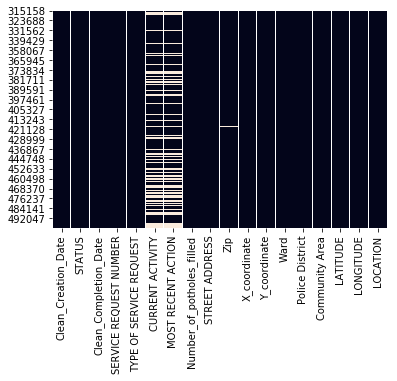

In [44]:
sns.heatmap(pothole_data1.isnull(), cbar=False)

# msno can also be used for the same purpose
# import missingno as msno
# msno.matrix(data)

<b> Hypothesis: <br> </b>
Number of potholes filled is NA when 'MOST RECENT ACTION' or 'CURRENT ACTIVITY' is NA

In [20]:
(pothole_data1['Number_of_potholes_filled'][pothole_data1['CURRENT ACTIVITY'].isna() \
                                           ].isna().sum())*100/pothole_data1['CURRENT ACTIVITY'].isna().sum()

99.22627995401892

In [21]:
(pothole_data1['Number_of_potholes_filled'][pothole_data1['MOST RECENT ACTION'].isna() \
                                           ].isna().sum())*100/pothole_data1['MOST RECENT ACTION'].isna().sum()

99.09921843952841

(1) We can at one level say that if the 'MOST RECENT ACTION' is NA the number of potholes filled will be zero. <br>
(2) SSA has the highest number of NA values and if the varible isn't important for modeling it can be dropped. <br>
(3) We can also drop enteries, where important variable for analysis like X,Y coordinates or Latitute of Longitude can't be imputed or substituted.One way of dealing with it is getting the right Latitude, Longitude from the X,Y coordinates or viceversa using google maps any other geospatial apps

In [22]:
#(1)
pothole_data1.loc[pothole_data1['Number_of_potholes_filled'].isna() &  pothole_data1['MOST RECENT ACTION'].isna() \
                  ,'Number_of_potholes_filled'] = 0 

C:\Users\Sanchayni\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Read more on how loc and iloc works here: https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/

In [23]:
#(2)
pothole_data1 = pothole_data1.drop(['SSA'],axis = 1)

In [24]:
#(3)
pothole_data1 = pothole_data1[pothole_data1['LATITUDE'].isna() == False]

In [25]:
pothole_data1.isna().sum()

Clean_Creation_Date              0
STATUS                           0
Clean_Completion_Date            0
SERVICE REQUEST NUMBER           0
TYPE OF SERVICE REQUEST          0
CURRENT ACTIVITY             45208
MOST RECENT ACTION           45265
Number_of_potholes_filled      159
STREET ADDRESS                   0
Zip                            545
X_coordinate                   114
Y_coordinate                   114
Ward                            83
Police District                 83
Community Area                  83
LATITUDE                         0
LONGITUDE                        0
LOCATION                         0
dtype: int64

### (4) Data Elimination Vs Imputation
More on Imputation: https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87
Types of imputations possible in python: https://github.com/iskandr/fancyimpute

In [26]:
Housepricing = pd.read_csv('http://math.iit.edu/~rellis/teaching/497All/497_RR_data/MELBOURNE_HOUSE_PRICES_LESS.csv')

In [27]:
Housepricing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,01-04-17,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,01-04-17,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,01-04-17,3067.0,Northern Metropolitan,4019.0,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,01-04-17,3040.0,Western Metropolitan,1543.0,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,01-04-17,3042.0,Western Metropolitan,3464.0,10.4,Moonee Valley City Council


In [28]:
Housepricing.isna().sum()*100/len(Housepricing)

Suburb            0.023145
Address           0.000000
Rooms             0.000000
Type              0.231448
Price            23.214234
Method            0.000000
SellerG           0.000000
Date              0.000000
Postcode          0.124403
Regionname        0.000000
Propertycount     0.115724
Distance          0.092579
CouncilArea       0.000000
dtype: float64

<b> Imputing dataframe by mean, median or mode </b> <br> 
PS: I won't recommend imputing by using mean, median or mode if you have a lot of NA values but this method makes sense when you have sparse NA presence as other Imputation methods (KNN, Mice, SoftImpute, IterativeImputer or BiScaler ) has high computation time.

Documentation for fancyimpute: https://github.com/iskandr/fancyimpute

In [33]:
Housepricing['Price'].fillna(Housepricing['Price'].mean(),inplace= True)
# What inplace does is rather than returning a new dataframe it will replace the existing dataframe 
Housepricing['Price'].isna().sum()

0

In [34]:
#Imputing rest with mean for now
Housepricing['Distance'].fillna(Housepricing['Distance'].mean(),inplace= True)
Housepricing['Propertycount'].fillna(Housepricing['Propertycount'].mean(),inplace= True)

In [35]:
Housepricing['Suburb'].value_counts().head()

Reservoir         701
Mount Waverley    479
Richmond          467
Glen Waverley     455
Bentleigh East    452
Name: Suburb, dtype: int64

In [36]:
Housepricing['Suburb'].fillna(Housepricing['Suburb'].mode(),inplace= True)

For a categorical column you would fill the NA values using mode

In [37]:
# OR
Housepricing['Suburb'].fillna('Reservoir',inplace= True)
Housepricing['Suburb'].isna().sum()

0

In [38]:
# Imputing rest of the catergorical values with mode
Housepricing['Type'].value_counts().head()
Housepricing['Type'].fillna('h',inplace= True)

In [39]:
Housepricing['Postcode'].value_counts().head()
Housepricing['Postcode'].fillna('3073',inplace= True)

In [40]:
Housepricing.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
dtype: int64

### (5) Normalization and standarization / Feature Scaling
Read more: https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

<b> Why do you need it? <br> </b>
It is used when the magnitute of the variable has an effect on your predictions. For example in Support Vector Machines, linear regression and even Principal Component Analysis.

In [46]:
Housepricing.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Postcode          object
Regionname        object
Propertycount    float64
Distance         float64
CouncilArea       object
dtype: object

In [47]:
Housepricing_numeric = Housepricing[['Price','Propertycount','Distance']]

<b> Normalization </b>

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [49]:
scaler.fit_transform(Housepricing_numeric)

array([[0.18624766, 0.18416547, 0.04680187],
       [0.15249756, 0.18416547, 0.04680187],
       [0.17749764, 0.18416547, 0.04680187],
       ...,
       [0.0959349 , 1.        , 0.18720749],
       [0.09749741, 1.        , 0.18720749],
       [0.08349737, 1.        , 0.18720749]])

In [50]:
Housepricing_norm = pd.DataFrame(scaler.fit_transform(Housepricing_numeric), columns=['Price','Propertycount','Distance'] )

<b> Standardization </b>

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
scaler.fit(Housepricing_numeric)
Housepricing_std = pd.DataFrame(scaler.transform(Housepricing_numeric), columns=['Price','Propertycount','Distance'])

### (6) Dummy Variables 
(for categorical variables) <br>
<b> Why do we need it? </b> <br>
Some ML models can't deal with categorical variables and requires all of it's independent variables to be numeric. If you have a categorical variable which cannot be directly translated into a numeric variable you can create dummy variables for that column.

We don't really need all the columns created after dummification. <br> Read why?: https://stattrek.com/multiple-regression/dummy-variables.aspx

In [53]:
# Lets try creating dummy variables for variable 'Type'
Housepricing['Type'].unique()

array(['h', 't', 'u'], dtype=object)

In [54]:
pd.get_dummies(Housepricing['Type']).head()

,h,t,u
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Do we really need all the three dummy variables created?

In [55]:
Housepricing = pd.concat([Housepricing, pd.get_dummies(Housepricing['Type'])], axis=1)
# Can deleter the orignal columns
# del Housepricing['Type']

Similarly you can create dummy varibles for other categorical data

### (7) Binning Variables 
<b> Why do we need it? </b> <br>
Depending on the situation, it can lead to a better interpretation of the numerical variable, quick user segmentation or just an additional feature for building your predictive model by creating bins for the numerical variable. You can also do categorical variable binning.

In [56]:
# Divides the data into equal-width bins
Housepricing['Price2'] = pd.cut(Housepricing['Price'], 3,labels=['Low','Medium','High']) 

In [57]:
Housepricing.groupby('Price2')['Price'].count()

Price2
Low       34051
Medium      483
High         31
Name: Price, dtype: int64

In [58]:
# Divides the data into quantiles
Housepricing['Price3'] = pd.qcut(Housepricing['Price'],4)

In [59]:
Housepricing.groupby('Price3')['Price'].count()

Price3
(22.999, 360000.0]        8666
(360000.0, 690000.0]      8655
(690000.0, 1050000.0]     8629
(1050000.0, 8000000.0]    8615
Name: Price, dtype: int64

Why aren't there same number of enteries in every bins: 
https://stackoverflow.com/questions/35183921/pandas-qcut-not-putting-equal-number-of-observations-into-each-bin

## Exploratory Data Analysis

### (1) Univariate plots

Histograms

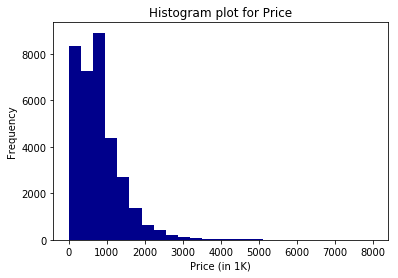

In [49]:
plt.hist(Housepricing['Price']/1000, bins=25, color='darkblue')
plt.xlabel('Price (in 1K)')
plt.ylabel('Frequency')
plt.title('Histogram plot for Price')
plt.show() 

C:\Users\Sanchayni\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


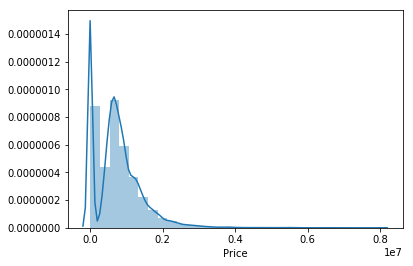

In [50]:
sns.distplot(Housepricing['Price'],bins = 30)

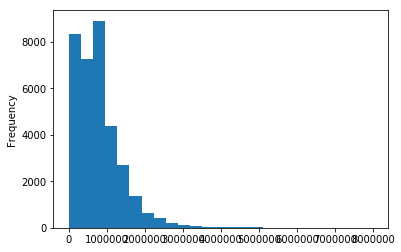

In [87]:
Housepricing['Price'].plot.hist(bins = 25)

Box plots

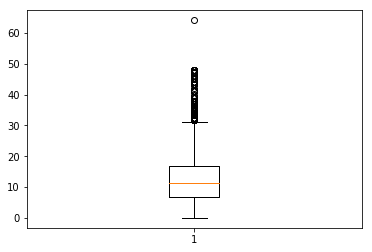

In [88]:
plt.boxplot(Housepricing['Distance'])
plt.show() 

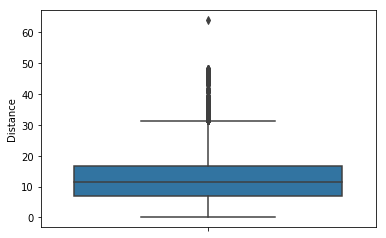

In [89]:
sns.boxplot(y= 'Distance',data=Housepricing)

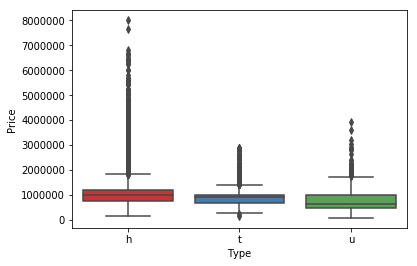

In [92]:
sns.boxplot(y= 'Price', x= 'Type',data=Housepricing, palette="Set1")

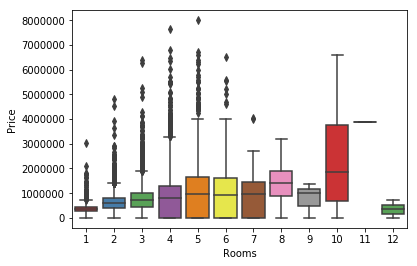

In [90]:
sns.boxplot(y= 'Price', x= 'Rooms',data=Housepricing, palette="Set1")

### (2) Bivariate plots

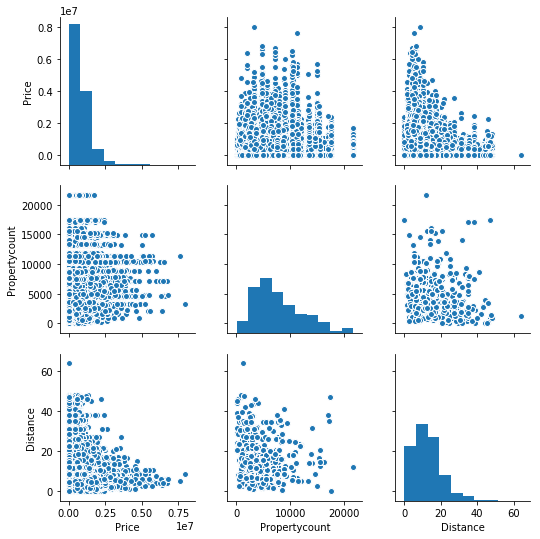

In [91]:
sns.pairplot(Housepricing_numeric)

In [20]:
Housepricing.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'h', 't', 'u', 'Price2'],
      dtype='object')

In [95]:
plt.rcParams['figure.figsize'] = (10,6)

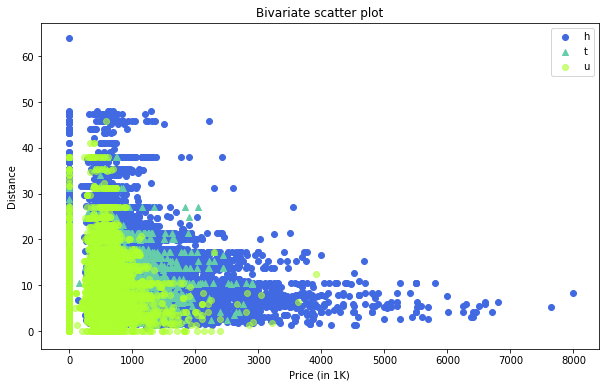

In [96]:
plt.scatter(x= Housepricing.loc[Housepricing['Type'] == 'h','Price']/1000, \
            y= Housepricing.loc[Housepricing['Type'] == 'h','Distance'],c= 'royalblue',marker = 'o')
plt.scatter(x= Housepricing.loc[Housepricing['Type'] == 't','Price']/1000, \
            y= Housepricing.loc[Housepricing['Type'] == 't','Distance'],c= 'mediumaquamarine',marker = '^')
plt.scatter(x= Housepricing.loc[Housepricing['Type'] == 'u','Price']/1000, \
            y= Housepricing.loc[Housepricing['Type'] == 'u','Distance'],c= 'greenyellow',marker = 'o',alpha=0.6)

plt.xlabel('Price (in 1K)')
plt.ylabel('Distance')
plt.title('Bivariate scatter plot')
plt.legend(('h','t','u'))

plt.show()

Color palette: https://matplotlib.org/examples/color/named_colors.html

In [29]:
plt.rcParams['figure.figsize'] = (7,5)

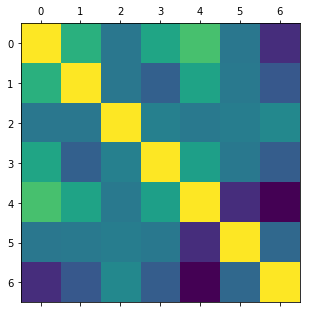

In [138]:
plt.matshow(Housepricing.corr())
plt.show()

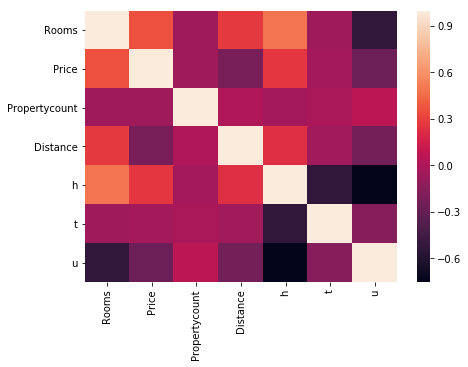

In [139]:
corr = Housepricing.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### (3) Outlier Detection and Treatment

<b>Based on Z score </b>

In [23]:
from scipy import stats
z_score = np.abs(stats.zscore(Housepricing_numeric))

In [24]:
threshold = 3
#np.where(z_score > 3)

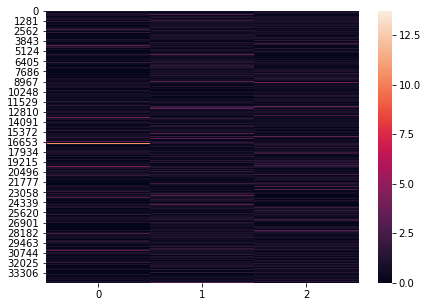

In [30]:
sns.heatmap(z_score)

<b>Based on IQR (interquartile range) </b>

In [68]:
def capping(col):
    quartiles = col.quantile([0.25,0.5,0.75]).values
    IQR = (quartiles[2] - quartiles[0])
    min_cap = quartiles[0] - (IQR*1.5)
    max_cap = quartiles[2] + (IQR*1.5)
    
    col.loc[col<min_cap] = min_cap
    col.loc[col>max_cap] = max_cap
    return(col)

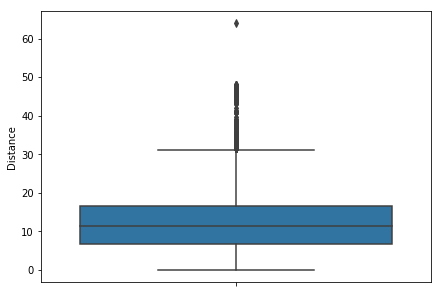

In [94]:
sns.boxplot(y= 'Distance',data=Housepricing_numeric)

In [95]:
Housepricing_numeric_capped = Housepricing_numeric.apply(lambda x: capping(x))

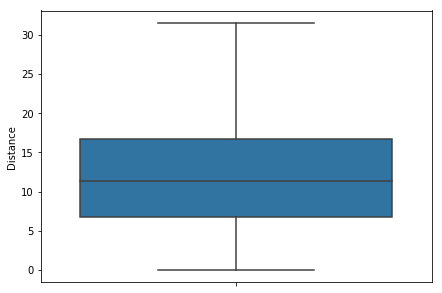

In [96]:
sns.boxplot(y= 'Distance',data=Housepricing_numeric_capped)

<b> Random Forest/ Decision tree and Categorical variables: </b><br>
Sadly I always used R for these models <br>
https://www.quora.com/Does-random-forest-works-with-categorical-variables
https://stats.stackexchange.com/questions/177852/best-practices-for-coding-categorical-features-for-decision-trees

#### Imputation!

In [31]:
from sklearn.preprocessing import Imputer

In [78]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0) 
imputer.fit(Housepricing[['Rooms','Price','Postcode','Propertycount','Distance']])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [79]:
Housepricing[['Rooms','Price','Postcode','Propertycount','Distance']] = \
imputer.transform(Housepricing[['Rooms','Price','Postcode','Propertycount','Distance']])

In [80]:
Imputations = pd.DataFrame({'Mean': Housepricing['Price']})

In [ ]:
from fancyimpute import KNN    

Using TensorFlow backend.
